In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('mock_student_data.csv')

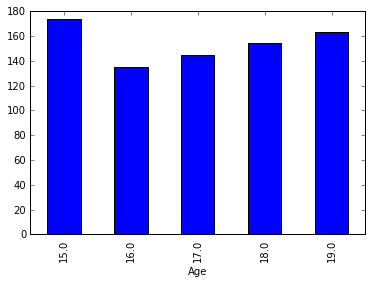

In [3]:
df.groupby('Age').size().plot.bar()

In [4]:
df.describe()


,ID,Age,GPA,Days_missed
count,1000.000000,771.000000,779.000000,808.000000
mean,500.500000,16.996109,2.988447,18.011139
std,288.819436,1.458067,0.818249,9.629371
min,1.000000,15.000000,2.000000,2.000000
25%,250.750000,16.000000,2.000000,9.000000
50%,500.500000,17.000000,3.000000,18.000000
75%,750.250000,18.000000,4.000000,27.000000
max,1000.000000,19.000000,4.000000,34.000000


In [5]:
df.groupby('Gender').size()


Gender
Female    398
Male      376
dtype: int64

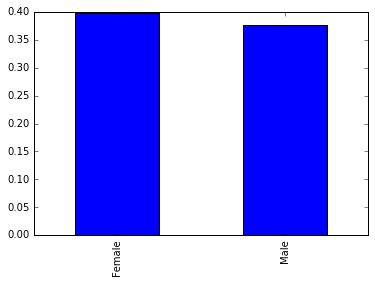

In [6]:
pd.value_counts(df.Gender, normalize= True).plot.bar()

In [8]:
df.describe(include = 'all')

,ID,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated
count,1000.000000,1000,1000,884,774,771.000000,779.000000,808.000000,1000
unique,NaN,200,244,49,2,NaN,NaN,NaN,2
top,NaN,Amy,Ross,Texas,Female,NaN,NaN,NaN,Yes
freq,NaN,12,13,97,398,NaN,NaN,NaN,593
mean,500.500000,NaN,NaN,NaN,NaN,16.996109,2.988447,18.011139,NaN
std,288.819436,NaN,NaN,NaN,NaN,1.458067,0.818249,9.629371,NaN
min,1.000000,NaN,NaN,NaN,NaN,15.000000,2.000000,2.000000,NaN
25%,250.750000,NaN,NaN,NaN,NaN,16.000000,2.000000,9.000000,NaN
50%,500.500000,NaN,NaN,NaN,NaN,17.000000,3.000000,18.000000,NaN
75%,750.250000,NaN,NaN,NaN,NaN,18.000000,4.000000,27.000000,NaN


In [9]:
rn = np.random.RandomState(0)
df = pd.DataFrame()
df['name'] = ['Gustav', 'Turab', 'Amy', 'Alice', 'Bob']
df['year'] = rn.randint(1,5, size = len(df))
df

,name,year
0,Gustav,1
1,Turab,4
2,Amy,2
3,Alice,1
4,Bob,4


In [10]:
df2 = pd.DataFrame()
df2['name'] = ['Anne', 'Gustav', 'Amy']
df2['city'] = ['New York', 'Chicago', 'Austin']
df2

,name,city
0,Anne,New York
1,Gustav,Chicago
2,Amy,Austin


In [13]:
dff = pd.concat((df,df2))

In [14]:
dff

,city,name,year
0,NaN,Gustav,1
1,NaN,Turab,4
2,NaN,Amy,2
3,NaN,Alice,1
4,NaN,Bob,4
0,New York,Anne,NaN
1,Chicago,Gustav,NaN
2,Austin,Amy,NaN


In [15]:
dff.loc[0,'name']

0    Gustav
0      Anne
Name: name, dtype: object

In [16]:
dff.iloc[0,'name']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [17]:
dff.iloc[0]

city       NaN
name    Gustav
year         1
Name: 0, dtype: object

In [19]:
dff.iloc[5] #treats it as an array of values

city    New York
name        Anne
year         NaN
Name: 0, dtype: object

In [20]:
dff.values

array([[nan, 'Gustav', 1.0],
       [nan, 'Turab', 4.0],
       [nan, 'Amy', 2.0],
       [nan, 'Alice', 1.0],
       [nan, 'Bob', 4.0],
       ['New York', 'Anne', nan],
       ['Chicago', 'Gustav', nan],
       ['Austin', 'Amy', nan]], dtype=object)

In [22]:
pd.merge(df, df2, how = 'inner') #takes intersection

,name,year,city
0,Gustav,1,Chicago
1,Amy,2,Austin


In [23]:
pd.merge(df, df2, how = 'outer') #takes union

,name,year,city
0,Gustav,1,Chicago
1,Turab,4,NaN
2,Amy,2,Austin
3,Alice,1,NaN
4,Bob,4,NaN
5,Anne,NaN,New York


In [24]:
pd.merge(df, df2, how = 'left') # A-B

,name,year,city
0,Gustav,1,Chicago
1,Turab,4,NaN
2,Amy,2,Austin
3,Alice,1,NaN
4,Bob,4,NaN


In [25]:
pd.merge(df,df2, how = 'right') #B - A

,name,year,city
0,Gustav,1,Chicago
1,Amy,2,Austin
2,Anne,NaN,New York


In [27]:
ydf = pd.DataFrame()
ydf['year'] = range(1,5)
ydf['name'] = ['Freshmen', 'Sophomore', 'Junior', 'Senior']
ydf

,year,name
0,1,Freshmen
1,2,Sophomore
2,3,Junior
3,4,Senior


In [28]:
pd.merge(df,ydf)

,name,year


In [29]:
pd.merge(df,ydf, how = 'outer')

,name,year
0,Gustav,1
1,Turab,4
2,Amy,2
3,Alice,1
4,Bob,4
5,Freshmen,1
6,Sophomore,2
7,Junior,3
8,Senior,4


In [30]:
pd.merge(df,ydf, how = 'right')

,name,year
0,Freshmen,1
1,Sophomore,2
2,Junior,3
3,Senior,4


In [31]:
pd.merge(df, ydf, on = 'year')

,name_x,year,name_y
0,Gustav,1,Freshmen
1,Alice,1,Freshmen
2,Turab,4,Senior
3,Bob,4,Senior
4,Amy,2,Sophomore


In [33]:
pd.merge(df, ydf, how = 'left', on = 'year')

,name_x,year,name_y
0,Gustav,1,Freshmen
1,Turab,4,Senior
2,Amy,2,Sophomore
3,Alice,1,Freshmen
4,Bob,4,Senior


In [35]:
zdf = pd.DataFrame()
zdf['year'] = range(1,4)
zdf['name'] = ['Freshmen', 'Sophomore', 'Junior']
zdf

,year,name
0,1,Freshmen
1,2,Sophomore
2,3,Junior


In [36]:
pd.merge(df, zdf, how = 'left', on = 'year')

,name_x,year,name_y
0,Gustav,1,Freshmen
1,Turab,4,NaN
2,Amy,2,Sophomore
3,Alice,1,Freshmen
4,Bob,4,NaN
